In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
data = pd.read_csv("crime/combined_crime_data.csv")
data.columns

Index(['DISTRICT', 'CUSTODIAL RAPE', 'OTHER IPC CRIMES', 'STATE/UT',
       'OTHER RAPE', 'CRIMINAL BREACH OF TRUST',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'THEFT', 'RAPE', 'RIOTS',
       'KIDNAPPING & ABDUCTION', 'ROBBERY', 'YEAR', 'AUTO THEFT',
       'OTHER THEFT', 'ATTEMPT TO MURDER', 'MURDER', 'ARSON',
       'TOTAL IPC CRIMES', 'DACOITY', 'COUNTERFIETING', 'BURGLARY',
       'CHEATING'],
      dtype='object')

In [37]:
data.shape

(10678, 23)


📊 Model Performance:
Mean Absolute Error (MAE): 430.12
Root Mean Squared Error (RMSE): 2258.97
R² Score: 0.9877


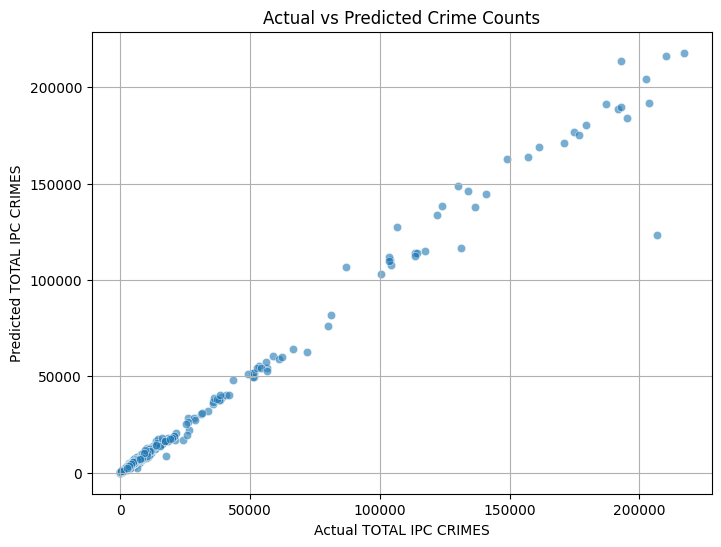

In [44]:
# Step 3: Encode Categorical Features
le_district = LabelEncoder()
data['DISTRICT'] = le_district.fit_transform(data['DISTRICT'])

# Convert YEAR to int if it's not
data['YEAR'] = data['YEAR'].astype(int)

# Drop STATE/UT if not useful
if 'STATE/UT' in data.columns:
    data.drop(['STATE/UT'], axis=1, inplace=True)

# Step 4: Define Features and Target
X = data.drop('TOTAL IPC CRIMES', axis=1)
y = data['TOTAL IPC CRIMES']

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual TOTAL IPC CRIMES")
plt.ylabel("Predicted TOTAL IPC CRIMES")
plt.title("Actual vs Predicted Crime Counts")
plt.grid(True)
plt.show()



In [50]:
le_district = LabelEncoder()
le_state = LabelEncoder()
data['DISTRICT'] = le_district.fit_transform(data['DISTRICT'])
data['STATE/UT'] = le_state.fit_transform(data['STATE/UT'])

# Ensure YEAR is integer
data['YEAR'] = data['YEAR'].astype(int)

# Step 4: Define Features and Target
X = data.drop('TOTAL IPC CRIMES', axis=1)
y = data['TOTAL IPC CRIMES']

In [51]:
# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [47]:
y_pred = model.predict(X_test)

# Step 8: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [18]:
rmse

2238.540580120036

In [52]:

# Features and target
X = data[['YEAR', 'STATE/UT']]  # You can add more features like DISTRICT
y = data['TOTAL IPC CRIMES']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

RMSE: 20717.79
R² Score: -0.0314
